# TP1 : LOG 6308

In [ ]:
# drive mount 
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
# drive mount 
import os
import sys 
os.chdir('/content/drive/My Drive/POLY/MAITRISE/Semestre4/LOG6308/TP1')

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy.sparse.csc import csc_matrix
import copy
import numpy.ma as ma
import scipy.stats as sp

random.seed(42)

In [ ]:
# items 
#items = pd.read_csv('Data/...')
# users
user = pd.read_csv('Data/u.csv')
# votes
votes = pd.read_csv('Data/votes.csv')

In [ ]:
## Matrice Utilisateur Item
MUI = votes.pivot(index="user.id", columns="item.id", values="rating")

In [ ]:
MUI

item.id  1     2     3     4     5     6     7     8     9     10    ...  \
user.id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
940       NaN   NaN   NaN   2.0   NaN   NaN   4.0   5.0   3.0   NaN  ...   
941       5.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  ...   
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

item.id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user.id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
939       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
940       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
941       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
943       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[943 rows x 1682 columns]

## 1. Question 1 - Méthodes de Base (5 points)

Calculez la performance prédictive de quelques approches qui donnent chacune une base de référence : 
- le vote aléatoire, -> mettre des valeurs aléatoires
- le vote moyen, -> moyenne des valeurs dans la matrice
- le vote moyen utilisateur, -> 
- le vote moyen item ->
- finalement le vote attendu (moyenne du vote moyen utilisateur et item). ->

Rapportez l'erreur quadratique moyenne et l'erreur absolue moyenne 
- (1) sans validation croisée et 
- (2) avec validation croisée de 5 replis. 

Déterminez si la différence entre l'erreur quadratique moyenne obtenue par le vote moyen item et le vote moyen utilisateur est statistiquement significative par un test d'hypothèse et en affichant les résultats visuellement.


### utils

In [ ]:
def RMSE_mat(y_pred, y_true):
    return np.sqrt(np.nanmean((y_pred - y_true)**2))
    
def MAE_mat(y_pred, y_true):
    return np.nanmean(np.abs(y_pred - y_true))

In [ ]:
# vote aléatoire (par besoin de train/test)
def pred_random(MUI_array_masked):
  return np.random.randint(1,6, MUI_array_masked.shape)

# vote moyen 
def pred_mean_vote(MUI_array_masked_train, MUI_array_masked_test):
  MUI_mean_pred = copy.deepcopy(MUI_array_masked_test)
  MUI_mean_pred.fill(np.nanmean(MUI_array_masked_train))
  return MUI_mean_pred

# vote moyen utilisateur
def pred_u_mean_vote(MUI_array_masked_train):
  '''
  we expect user_mean_pred to be a vector of the mean values per user of the training set
  '''
  user_mean_pred = np.nanmean(MUI_array_masked_train, axis = 1)
  MUI_mean_user_pred = user_mean_pred.data.reshape((-1,1))
  return MUI_mean_user_pred, user_mean_pred

# vote moyen item
def pred_i_mean_vote(MUI_array_masked_train):
  '''
  we expect item_mean_pred to be a vector of the mean values per item of the training set
  '''
  item_mean_pred = np.nanmean(MUI_array_masked_train, axis = 0)
  MUI_mean_item_pred = item_mean_pred.data.reshape((1,-1))
  return MUI_mean_item_pred, item_mean_pred

In [ ]:
def pred_and_eval_all_vote(MUI_array_masked_train, MUI_array_masked_test, verbose = False):
  # random vote
  MUI_random_pred = pred_random(MUI_array_masked_train)

  RMSE_random = RMSE_mat(MUI_array_masked_test, MUI_random_pred )
  MAE_random = MAE_mat(MUI_array_masked_test, MUI_random_pred)
  

  # mean vote
  MUI_mean_pred = pred_mean_vote(MUI_array_masked_train, MUI_array_masked_test)

  RMSE_mean = RMSE_mat(MUI_array_masked_test, MUI_mean_pred )
  MAE_mean = MAE_mat(MUI_array_masked_test, MUI_mean_pred)
  

  # mean item
  item_mean_pred = np.nanmean(MUI_array_masked_train, axis = 0)
  MUI_mean_item_pred = item_mean_pred.data.reshape((1,-1))

  RMSE_mean_item = RMSE_mat(MUI_array_masked_test, MUI_mean_item_pred )
  MAE_mean_item = MAE_mat(MUI_array_masked_test, MUI_mean_item_pred)
  

  # mean user
  user_mean_pred = np.nanmean(MUI_array_masked_train, axis = 1)
  MUI_mean_user_pred = user_mean_pred.data.reshape((-1,1))

  RMSE_mean_user = RMSE_mat(MUI_array_masked_test, MUI_mean_user_pred )
  MAE_mean_user = MAE_mat(MUI_array_masked_test, MUI_mean_user_pred )
  

  # expected vote
  MUI_expected_pred = np.add.outer(user_mean_pred,item_mean_pred) /2

  RMSE_expected = RMSE_mat(MUI_array_masked_test, MUI_expected_pred )
  MAE_expected = MAE_mat(MUI_array_masked_test, MUI_expected_pred)

  if verbose :
    print("MSE : ", RMSE_expected)
    print("MAE : ", MAE_expected)

    print("random_vote")
    print("RMSE : ", RMSE_random)
    print("MAE : ", MAE_random)

    print("mean vote")
    print("RMSE : ", RMSE_mean)
    print("MAE : ", MAE_mean)

    print("mean item")
    print("RMSE : ", RMSE_mean_item)
    print("MAE : ", MAE_mean_item )

    print("mean user")
    print("MSE : ", RMSE_mean_user )
    print("MAE : ", MAE_mean_user)

  return (RMSE_random, RMSE_mean, RMSE_mean_item, RMSE_mean_user, RMSE_expected), (MAE_random, MAE_mean, MAE_mean_item, MAE_mean_user, MAE_expected)

In [ ]:
def pred_and_eval_all_vote(MUI_array_masked_train, MUI_array_masked_test, verbose = False):
  # random vote
  MUI_random_pred = pred_random(MUI_array_masked_train)

  RMSE_random = RMSE_mat(MUI_array_masked_test, MUI_random_pred )
  MAE_random = MAE_mat(MUI_array_masked_test, MUI_random_pred)
  

  # mean vote
  MUI_mean_pred = pred_mean_vote(MUI_array_masked_train, MUI_array_masked_test)

  RMSE_mean = RMSE_mat(MUI_array_masked_test, MUI_mean_pred )
  MAE_mean = MAE_mat(MUI_array_masked_test, MUI_mean_pred)
  

  # mean item
  item_mean_pred = np.nanmean(MUI_array_masked_train, axis = 0)
  MUI_mean_item_pred = item_mean_pred.data.reshape((1,-1))

  RMSE_mean_item = RMSE_mat(MUI_array_masked_test, MUI_mean_item_pred )
  MAE_mean_item = MAE_mat(MUI_array_masked_test, MUI_mean_item_pred)
  

  # mean user
  user_mean_pred = np.nanmean(MUI_array_masked_train, axis = 1)
  MUI_mean_user_pred = user_mean_pred.data.reshape((-1,1))

  RMSE_mean_user = RMSE_mat(MUI_array_masked_test, MUI_mean_user_pred )
  MAE_mean_user = MAE_mat(MUI_array_masked_test, MUI_mean_user_pred )
  

  # expected vote
  MUI_expected_pred = np.add.outer(user_mean_pred,item_mean_pred) /2

  RMSE_expected = RMSE_mat(MUI_array_masked_test, MUI_expected_pred )
  MAE_expected = MAE_mat(MUI_array_masked_test, MUI_expected_pred)

  if verbose :
    

    print("random_vote")
    print("RMSE : ", RMSE_random)
    print("MAE : ", MAE_random)

    print("mean vote")
    print("RMSE : ", RMSE_mean)
    print("MAE : ", MAE_mean)

    print("mean item")
    print("RMSE : ", RMSE_mean_item)
    print("MAE : ", MAE_mean_item )

    print("mean user")
    print("MSE : ", RMSE_mean_user )
    print("MAE : ", MAE_mean_user)

    print("expected vote")
    print("MSE : ", RMSE_expected)
    print("MAE : ", MAE_expected)

  return (RMSE_random, RMSE_mean, RMSE_mean_item, RMSE_mean_user, RMSE_expected), (MAE_random, MAE_mean, MAE_mean_item, MAE_mean_user, MAE_expected)

In [ ]:
def k_fold_cross_validation_train_pred(mask, MUI_array_masked, forced_train_indices, k_fold=2, verbose=False):
  '''cross validation'''


  RMSE_random_cv, MAE_random_cv, RMSE_mean_cv, MAE_mean_cv, RMSE_mean_item_cv,\
   MAE_mean_item_cv, RMSE_mean_user_cv, MAE_mean_user_cv, RMSE_expected_cv, MAE_expected_cv=[],[],[],[],[],[],[],[],[],[]
  
  # with no cross validation k_fold = 1 and the matrix of training = matrix of test
  if k_fold == 1:
    # predict and evaluate on test set
    (RMSE_random, RMSE_mean, RMSE_mean_item, RMSE_mean_user, RMSE_expected),\
      (MAE_random, MAE_mean, MAE_mean_item, MAE_mean_user, MAE_expected) = pred_and_eval_all_vote(MUI_array_masked, MUI_array_masked, verbose=verbose)
    
    # random vote
    RMSE_random_cv.append(RMSE_random)
    MAE_random_cv.append(MAE_random)

    # mean vote
    RMSE_mean_cv.append(RMSE_mean)
    MAE_mean_cv.append(MAE_mean)

    # mean_item vote
    RMSE_mean_item_cv.append(RMSE_mean_item)
    MAE_mean_item_cv.append(MAE_mean_item)
    
    # mean_user vote
    RMSE_mean_user_cv.append(RMSE_mean_user)
    MAE_mean_user_cv.append(MAE_mean_user)

    # expected vote
    RMSE_expected_cv.append(RMSE_expected)
    MAE_expected_cv.append(MAE_expected)

  else : 
    sparse_mask = csc_matrix(mask)

    idx = np.arange(len(sparse_mask.data))
    np.random.shuffle(idx)
    
    idx_split = np.array_split(idx, k_fold)
    for i in range(k_fold):
      # test split
      idx_test  = idx_split[i]
      idx_train = [x for j,x in enumerate(idx_split) if i!=j]
      idx_train = np.concatenate(idx_train).ravel().tolist()

      # define the masks to apply on the sparse matrix
      sparse_mask_train = copy.deepcopy(sparse_mask) #.tolil()
      sparse_mask_test = copy.deepcopy(sparse_mask) #.tolil()

      sparse_mask_train.data[idx_test] = 0 # we mask to 0 the test set indices
      sparse_mask_test.data[idx_train] = 0 # we mask to 0 the train set indices

      if verbose :
        print("iteration ", i)
        print("train : ", np.sum(np.array(sparse_mask_train.todense())), "\n", "test : ",np.sum(np.array(sparse_mask_test.todense())))

      # we define the final mask array to apply to our initial MUI matrix
      arr_mask_train = np.array(sparse_mask_train.todense())
      arr_mask_test = np.array(sparse_mask_test.todense())

      assert np.sum(arr_mask_train + arr_mask_test == mask) == mask.shape[0]*mask.shape[1]

      # we add to the training set the indices corresponding to rows(users) and columns(item) with only one vote 
      arr_mask_train[forced_train_indices]= 1

      # we apply the masks to the vote matrix
      MUI_array_masked_test = ma.masked_array(MUI_array_masked, mask=1-arr_mask_test)
      MUI_array_masked_train = ma.masked_array(MUI_array_masked, mask=1-arr_mask_train)

      # predict and evaluate on test set
      (RMSE_random, RMSE_mean, RMSE_mean_item, RMSE_mean_user, RMSE_expected),\
        (MAE_random, MAE_mean, MAE_mean_item, MAE_mean_user, MAE_expected) = pred_and_eval_all_vote(MUI_array_masked_train, MUI_array_masked_test, verbose=verbose)
      
      # random vote
      RMSE_random_cv.append(RMSE_random)
      MAE_random_cv.append(MAE_random)

      # mean vote
      RMSE_mean_cv.append(RMSE_mean)
      MAE_mean_cv.append(MAE_mean)

      # mean_item vote
      RMSE_mean_item_cv.append(RMSE_mean_item)
      MAE_mean_item_cv.append(MAE_mean_item)
      
      # mean_user vote
      RMSE_mean_user_cv.append(RMSE_mean_user)
      MAE_mean_user_cv.append(MAE_mean_user)

      # expected vote
      RMSE_expected_cv.append(RMSE_expected)
      MAE_expected_cv.append(MAE_expected)
    


  method_names = ["random_cv", "mean_cv", "mean_user_cv", "mean_item_cv","expected_cv"]
  mean_cv = np.array([[np.mean(RMSE_random_cv), np.mean(MAE_random_cv)], \
                      [np.mean(RMSE_mean_cv), np.mean(MAE_mean_cv)],\
                      [np.mean(RMSE_mean_user_cv), np.mean(MAE_mean_user_cv)],\
                      [np.mean(RMSE_mean_item_cv), np.mean(MAE_mean_item_cv)],\
                      [np.mean(RMSE_expected_cv), np.mean(MAE_expected_cv)]])
  results_tab = pd.DataFrame(mean_cv.T, columns=method_names, index=['RMSE', 'MAE'])
  return results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv

In [ ]:
def tests(mean_user: list, mean_item: list, verbose: bool = False):
    """Effectue un test T entre les deux entrées, en vérifiant si la moyenne des deux distributions est
    le même. Vérifie également si les deux ensembles de données d'entrée ont une distribution normale et ont la
    même variance (une exigence pour le test T).

    Référence : https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests

    Arguments :
        mean_user (pd.DataFrame): list 1 des valeurs (ici RMSE mean_user)
        mean_item (pd.DataFrame): list 2 (ici RMSE mean_item)
        verbose (bool): S'il faut afficher les résultats

    Retour:
        Tuple[float, float, float, float] : p_test, p_wd_isnormal, p_we_isnormal, p_vartest
    """

    p_ttest, p_l1_normal, p_l2_normal, p_vartest = None, None, None, None
    
    # calcul de la valeur-p pour le test t
    _, p_ttest = sp.ttest_ind(mean_user, mean_item)

    # calul de la valeur-p pour le test de normalité sur les données mean_user et mean_item séparement
    # C'est à dire est-ce que les 2 distributions sont normales
    _, p_mean_user_normal = sp.normaltest(mean_user)
    _, p_mean_item_normal = sp.normaltest(mean_item)

    # valeur-p pour le test qui vérifie si ces 2 distributions ont la même variance
    _, p_vartest = sp.levene(mean_user, mean_item)

    if verbose:
        print(f"p_value:\t{p_ttest}")
        print(f"p_value mean_user normality:\t{p_mean_user_normal}")
        print(f"p_value mean_item normality:\t{p_mean_item_normal}")
        print(f"p_value Variance test:\t{p_vartest}")

    return p_ttest, p_mean_user_normal, p_mean_item_normal, p_vartest

### Entrainement

In [ ]:
# we define a mask to ignore the nan values during the mathemical operation
mask = np.array(MUI.notnull())+0
MUI_array = copy.deepcopy(MUI.to_numpy())

# Mask the User-Item matrix
MUI_array_masked = ma.masked_array(MUI_array, mask=(1-mask))

In [ ]:
# we define a new mask from the mask of nans in order to perfrm the splitting of the train/test. 
# In this new mask we ignore the rows and columns with only 1 vote, 
# those votes are saved and put by default in the train set.
mask_to_split = copy.deepcopy(mask)

# store the indices which corresponds to single vote per item (ie columns with only one vote)
# We will assign then automatically to the train set
# in this dataset there a no user with no votes
forced_train_indices = np.where((mask_to_split==1) & (np.sum(mask_to_split , axis=0)==1)) 

mask_to_split[forced_train_indices] = 0

#### sans validation croisée (5 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 1
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = forced_train_indices,
                                                                                       k_fold=1)
results_tab

random_cv   mean_cv  mean_user_cv  mean_item_cv  expected_cv
RMSE   1.883778  1.125668      1.030812      1.000070     0.966809
MAE    1.511540  0.944700      0.826226      0.798958     0.782583

#### avec validation croisée (5 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 5
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask_to_split,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = forced_train_indices,
                                                                                       k_fold=5,
                                                                                       verbose = False)
results_tab

random_cv   mean_cv  mean_user_cv  mean_item_cv  expected_cv
RMSE   1.876829  1.124510      1.042033      1.022289     0.981475
MAE    1.503680  0.943969      0.835287      0.815400     0.794152

Remarque :

on observe que avec la validation croisée on a des résultats moins bon, ce qui logique puisque sans validation croisée nos données d'évaluations sont aussi nos donées d'entrainement. Tandis que avec la validation croisée on évalue nos modéles sur de nouvelles données qui constitue l'ensemble de test).

### T-Test

Définissons l'***hypothése null*** suivante : "La moyenne des résultats RMSE pour 5 replis pour le vote moyen par item est ***égale*** à celle le vote moyen par utilisateur"

L'***hypothése alternatif*** est la suivante : "La moyenne des résultats RMSE pour 5 replis pour le vote moyen par item est ***différente*** à celle le vote moyen par utilisateur"


Le T-test fait les hypothéses suivante:
- la distribution des RMSE pour la méthode de moyenne de vote par item est ***normal***
- la distribution des RMSE pour la méthode de moyenne de vote par utilisateur est ***normal***
- le ***variance*** des RMSE pour la méthode de vote moyen par item est ***égale*** à celle pour le vote moyen par utilisateur.


Pour vérifier que ces conditions sont repecter on applique des tests de normalité et le test de levene pour verifier l'égalité des variances en utilisant scipy.

Cependant, pour réaliser les tests de normalité il faut a moins 8 points (donc 8 replis) avec la librairie scipy. Par conséquent pour les 5 replis on supposera que toutes ces hypothéses sont respectés, puis par la suite on réalisera un test sur 10 replis en vérifiant que ces tests sont resectés.

#### K = 5 (5 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 5
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = (x_train_indices,y_train_indices),
                                                                                       k_fold=5, verbose=False)

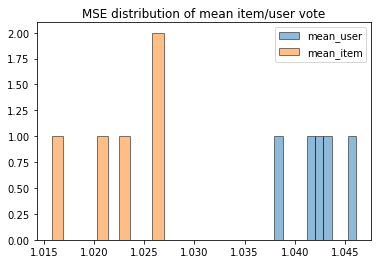

In [ ]:
import matplotlib.pyplot as plt

plt.hist(RMSE_mean_user_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_user')
plt.hist(RMSE_mean_item_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_item')
plt.legend(loc='upper right')
plt.title("MSE distribution of mean item/user vote")
plt.show()

In [ ]:
# p_ttest, p_mean_user_normal, p_mean_item_normal, p_vartest = tests(mean_user = RMSE_mean_user_cv, mean_item = RMSE_mean_item_cv, verbose = True)

In [ ]:
_, p_ttest = sp.ttest_ind(RMSE_mean_user_cv, RMSE_mean_item_cv)
print("p_value", p_ttest)

p_value 3.6618563564134596e-05


NB : on a p_value < 5%, donc l'ypothése null est rejeté et les résultats RMSE pour le vote moyen item sont bien différent en moyenne du vote moyen utilisateuur. En l'occurence, ici le vote moyen par item offre de meilleur résultats en moyenne que le vote par utilisateur.

Cependant on ne peut pas conclure réelement que les moyennes des deux distributions de RMSE sont différentes car on n'a pas vérifier les tests d'hypothéses du a manque de points. Essayons donc avec 10 replis :

#### K = 10 (10 replis)

In [ ]:
# perform the k_fold cross validation with splitting of train/tes split, training and prediction
# k = 10
results_tab, RMSE_mean_user_cv, RMSE_mean_item_cv = k_fold_cross_validation_train_pred(mask_to_split,
                                                                                       MUI_array_masked, 
                                                                                       forced_train_indices = (x_train_indices,y_train_indices),
                                                                                       k_fold=10)

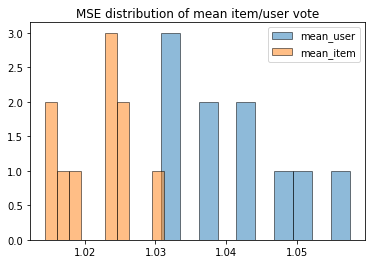

In [ ]:
import matplotlib.pyplot as plt

plt.hist(RMSE_mean_user_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_user')
plt.hist(RMSE_mean_item_cv, bins = int(50/5), alpha=0.5, edgecolor = 'black', label='mean_item')
plt.legend(loc='upper right')
plt.title("MSE distribution of mean item/user vote")
plt.show()

In [ ]:
p_ttest, p_mean_user_normal, p_mean_item_normal, p_vartest = tests(mean_user = RMSE_mean_user_cv, mean_item = RMSE_mean_item_cv, verbose = True)

p_value:	1.1599257742803136e-05
p_value mean_user normality:	0.6790135484190041
p_value mean_item normality:	0.9243407235835426
p_value Variance test:	0.13782607504405853


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Pour un repli de 10:

- p_ttest : <0.05 (l'hypothse sur l'égalité des moyennnes est rejeté) -> ***L'hypothése nulle est rejeté***
- p_value "mean user vote" normality: >0.05 (l'hypothèse sur la normalité est accepté) -> ***condition respectée***
- p_value "mean_item" normality :	 > 0.05 (l'hypothèse sur la normalité est accepté) -> ***condition respectée***
- Variance test: >0.05 (l'hypothèse sur l'égalité des variances est accepté) -> ***condition respectée***

Donc, les hypothèses sur l'égalité des variances et sur la normalité pour mean user vote sont respectés. Il n'y a que le test de normalité sur mean_item qui n'est pas respecté.

Par conséquent, on ne peut pas vraiement conclure quoique ce soit, en effet on ne peut pas dire avec certitude que les RMSE du vote moyen item sont normalement ditribué.

En réalité, même avec toutes ces conditionns respectées, 10 points par distributions n'est pas suffisant pour conclure quoique ce soit. Les résultats sont sensibles à la seed choisie. Il nous faudrait beaucoup plus de point (au moins 30) que l'on pourrait simuler en faisant un "repeated k_fold", c'est a dire reiterer plusieurs fois le cross validation pour des seed aléatoire différent.

## Question 2 - Filtres Collaboratifs (15 points)

Chaque nouvelle étape s'ajoute aux méthodes appliquées aux étapes précédentes.








### 2.1 (6 points)
Calculez l'erreur des prédictions des approches de filtres collaboratifs item-item et utilisateur-utilisateur. Utilisez le cosinus comme mesure de similarité entre items. Procédez par étape et rapportez, à chaque étape, l'erreur quadratique moyenne et l'erreur absolue moyenne.
Répéter pour chacune des deux approches, item-item et utilisateur-utilisateur, les étapes suivantes :
Étapes
Prédiction avec tous les utilisateurs/items (sans voisins rapprochés) et sans correction pour biais utilisateur/item. 




### 2.2 (4 points)
Correction pour biais utilisateur/item. Vous pouvez prendre l'ensemble des les valeurs observées dans le calcul des moyennes items et utilisateurs (des précisions sur ce point seront données en classe — voir aussi le bonus en (f)). 



### 2.3 (2 points)
Ajout de 100 voisins rapprochés (ou le maximum disponible jusqu'à concurrence de 100). Vous pouvez prendre le cosinus ou la distance euclidienne pour les voisins rapprochés. 
Correction pour le nombre de votes communs. (2 point)
Correction pour le facteur de rareté (fréquence inverse utilisateur). (1 point)

### bonus (2 points)
Un bonus de 2 points sera accordé si, à la question (b), vous évaluez correctement le biais entraîné par l'inclusion de la valeur observée dans le calcul de la moyenne pour cette même valeur prédite. Le maximum au TP demeure cependant de 20/20.